In [1]:
from environments.environment import ForexEnv
from environments.utils import create_ta_features, add_time_features
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [2]:
sp500_df = create_ta_features()
sp500_df = add_time_features(sp500_df)
sp500_df.head()

[*********************100%***********************]  1 of 1 completed


C:\Users\Maciej\anaconda3\envs\pytorch_gpu\lib\site-packages\finta\finta.py:399: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for x, y in zip(x.fillna(0).iteritems(), y.iteritems()):
C:\Users\Maciej\anaconda3\envs\pytorch_gpu\lib\site-packages\finta\finta.py:399: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for x, y in zip(x.fillna(0).iteritems(), y.iteritems()):
C:\Users\Maciej\anaconda3\envs\pytorch_gpu\lib\site-packages\finta\finta.py:399: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for x, y in zip(x.fillna(0).iteritems(), y.iteritems()):
C:\Users\Maciej\anaconda3\envs\pytorch_gpu\lib\site-packages\finta\finta.py:399: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for x, y in zip(x.fillna(0).iteritems(), y.iteritems()):
C:\Users\Maciej\anaconda3\envs\pytorch_g

,open,high,low,close,volume,ADL,ADX,AO,ATR,BBWIDTH,...,WILLIAMS,WMA,WOBV,ZLEMA,sin_weekday,cos_weekday,sin_monthday,cos_monthday,sin_yearday,cos_yearday
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,-1.299113,-1.286708,-1.293664,-1.282928,0.049746,-1.833595,6.432831,-0.703535,-0.730905,0.147278,...,-0.179769,-1.272791,-1.100389,-1.275609,0.000000,1.000000,0.724793,0.688967,0.068802,0.997630
2010-01-05,-1.282826,-1.283933,-1.280318,-1.279357,-1.377868,-1.830133,6.432831,-0.703535,-0.730905,0.147278,...,-0.179769,-1.272791,-1.100389,-1.275609,0.781831,0.623490,0.848644,0.528964,0.085965,0.996298
2010-01-06,-1.279741,-1.281359,-1.275947,-1.278730,0.983417,-1.828580,6.432831,-0.703535,-0.730905,0.147278,...,-0.179769,-1.272791,-1.098638,-1.275609,0.974928,-0.222521,0.937752,0.347305,0.103102,0.994671
2010-01-07,-1.279174,-1.278071,-1.278627,-1.274127,1.266984,-1.822062,6.432831,-0.703535,-0.730905,0.147278,...,-0.179769,-1.272791,-1.085015,-1.275609,0.433884,-0.900969,0.988468,0.151428,0.120208,0.992749
2010-01-08,-1.274875,-1.275126,-1.273635,-1.270798,0.428625,-1.816325,6.432831,-0.703535,-0.730905,0.147278,...,-0.179769,-1.272791,-1.076811,-1.275609,-0.433884,-0.900969,0.998717,-0.050649,0.137279,0.990532


In [3]:
# rename ohlc columns so that they are compatible with the gym environment
sp500_df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close'}, inplace=True)

### Create environment

In [4]:
from environments.environment import SP500TradingEnv
my_env = SP500TradingEnv(sp500_df, window_len=20)

In [5]:
my_env.action_space

Box([-1.], [1.], (1,), float32)

In [6]:
my_env.observation_space

Box([[-10. -10. -10. ... -10. -10. -10.]
 [-10. -10. -10. ... -10. -10. -10.]
 [-10. -10. -10. ... -10. -10. -10.]
 ...
 [-10. -10. -10. ... -10. -10. -10.]
 [-10. -10. -10. ... -10. -10. -10.]
 [-10. -10. -10. ... -10. -10. -10.]], [[10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 ...
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]
 [10. 10. 10. ... 10. 10. 10.]], (20, 72), float32)

In [9]:
my_env.get_observation()

array([[-1.29911284, -1.28670754, -1.29366371, ...,  0.68896692,
         0.06880243,  0.99763031],
       [-1.28282587, -1.28393269, -1.28031773, ...,  0.52896401,
         0.0859648 ,  0.99629817],
       [-1.27974052, -1.28135898, -1.27594726, ...,  0.34730525,
         0.1031017 ,  0.99467082],
       ...,
       [-1.27673593, -1.27895612, -1.2954161 , ..., -0.44039415,
         0.35367612,  0.93536795],
       [-1.30019534, -1.30518639, -1.32053909, ..., -0.25065253,
         0.36972454,  0.92914141],
       [-1.30019534, -1.30518639, -1.32053909, ..., -0.05064917,
         0.38566341,  0.92263955]])

In [7]:
env = ForexEnv(sp500_df, window_size=10, frame_bound=(10, 100))

In [8]:
env.signal_features

array([[-1.28292807e+00,  0.00000000e+00],
       [-1.27935684e+00,  3.57123158e-03],
       [-1.27872961e+00,  6.27231662e-04],
       [-1.27412657e+00,  4.60303322e-03],
       [-1.27079813e+00,  3.32844019e-03],
       [-1.27079813e+00,  0.00000000e+00],
       [-1.27079813e+00,  0.00000000e+00],
       [-1.26877479e+00,  2.02334388e-03],
       [-1.27966039e+00, -1.08855999e-02],
       [-1.27008989e+00,  9.57050051e-03],
       [-1.26727753e+00,  2.81235413e-03],
       [-1.27985255e+00, -1.25750130e-02],
       [-1.27985255e+00,  0.00000000e+00],
       [-1.27985255e+00,  0.00000000e+00],
       [-1.27985255e+00,  0.00000000e+00],
       [-1.26548685e+00,  1.43656921e-02],
       [-1.27781908e+00, -1.23322216e-02],
       [-1.29963078e+00, -2.18117063e-02],
       [-1.32463928e+00, -2.50085007e-02],
       [-1.32463928e+00,  0.00000000e+00],
       [-1.32463928e+00,  0.00000000e+00],
       [-1.31956067e+00,  5.07861289e-03],
       [-1.32422446e+00, -4.66379281e-03],
       [-1.

In [9]:
env.action_space

Discrete(2)

In [7]:
state = env.reset()

NameError: name 'env' is not defined

info {'total_reward': 1193.3665876897169, 'total_profit': 0.9790739300758149, 'position': 1}


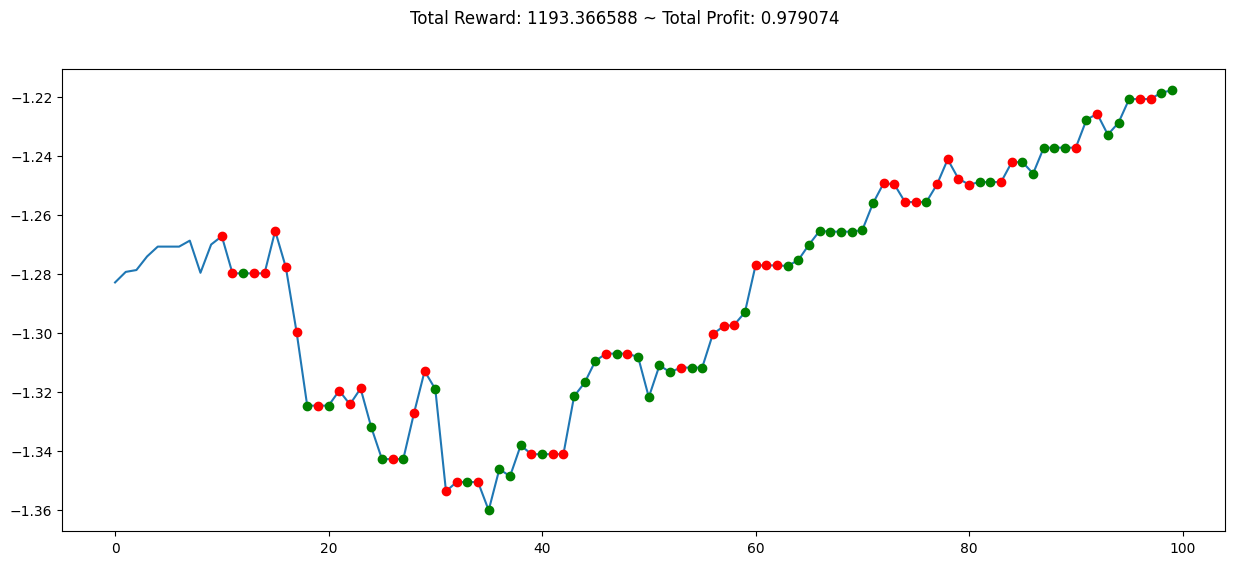

In [13]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()